In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

In [31]:
image = plt.imread('image.jpg')

In [32]:
image.shape

(1600, 1200, 3)

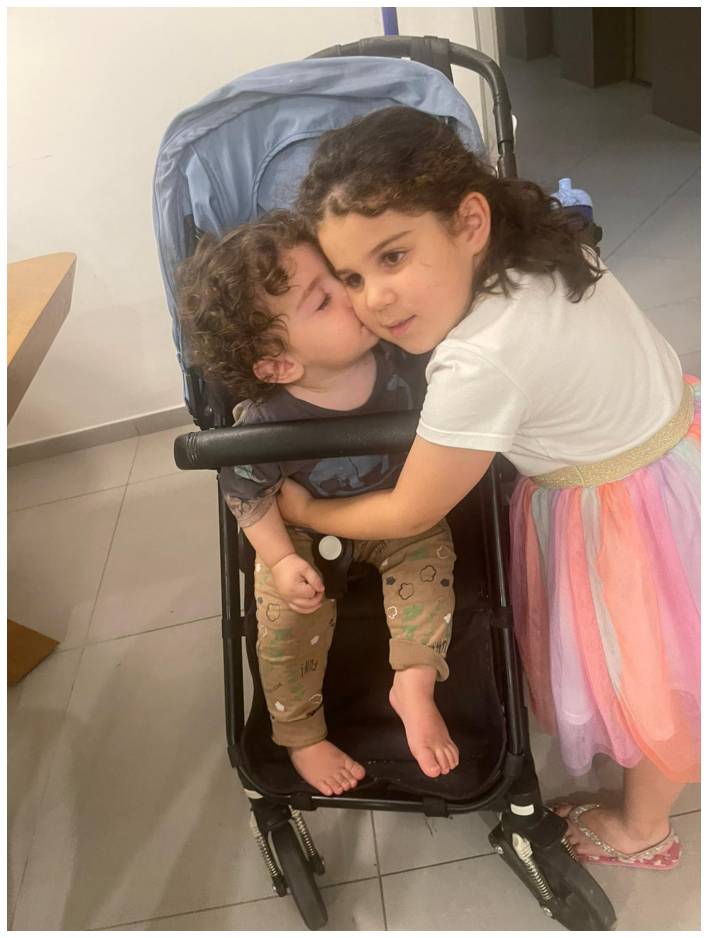

In [33]:
plt.figure(figsize=(22, 17))  
plt.imshow(image)
plt.axis('off')
plt.savefig('figures/original_image.pdf')

In [34]:
# Reshape the 3D image into a 2D array by stacking the color channels horizontally
height, width, channels = image.shape
flat_image = image.reshape(-1, width * channels)

flat_image.shape

(1600, 3600)

In [35]:
np.linalg.matrix_rank(flat_image)

1600

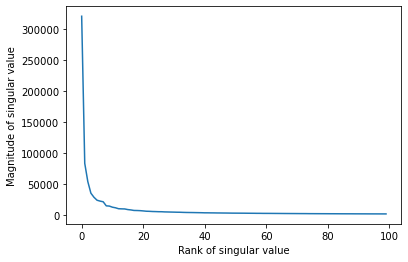

In [36]:
# Plot the first 100 singular values of the matrix
U, S, Vt = np.linalg.svd(flat_image)

k = 100
plt.plot(np.arange(k), S[:k])
plt.xlabel('Rank of singular value')
plt.ylabel('Magnitude of singular value')

plt.savefig('figures/image_singular_values.pdf', bbox_inches='tight')

In [37]:
svd = TruncatedSVD(n_components=100)  
truncated_image = svd.fit_transform(flat_image)

truncated_image.shape

(1600, 100)

In [38]:
100 / 3600

0.027777777777777776

In [45]:
reconstructed_image = svd.inverse_transform(truncated_image)

array([[235.65850342, 225.8820957 , 208.74326453, ...,  58.43483909,
         48.26063376,  34.65323844],
       [238.24270058, 228.60293879, 211.55913482, ...,  58.51570497,
         47.67625897,  33.90485444],
       [240.99395175, 231.37914517, 214.36880791, ...,  58.31642594,
         47.15214542,  33.36338506],
       ...,
       [123.29684746, 105.78161102,  86.07519685, ..., 207.26928588,
        184.30771845, 162.11189857],
       [123.29706055, 105.6474938 ,  86.09171451, ..., 206.66070731,
        183.33274433, 161.53994293],
       [122.12103925, 103.78795548,  83.73813412, ..., 206.49250908,
        183.29731199, 162.22061691]])

In [47]:
reconstruction_error = np.mean(np.square(reconstructed_image - flat_image))
reconstruction_error

29.311717461460415

In [41]:
np.sqrt(reconstruction_error)

5.415098467786374

In [42]:
reconstructed_image = reconstructed_image.reshape(height, width, channels)
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')

In [43]:
reconstructed_image.shape

(1600, 1200, 3)

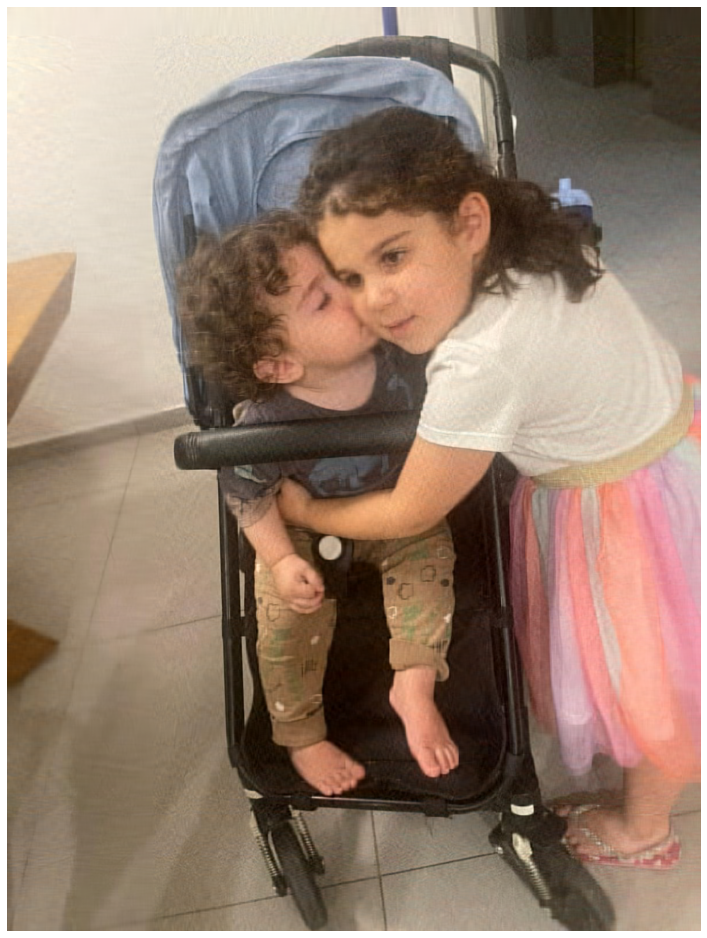

In [44]:
plt.figure(figsize=(22, 17)) 
plt.imshow(reconstructed_image)
plt.axis('off')

plt.savefig('figures/reconstructed_image.pdf')

In [16]:
def compress_image(image, n_components=100):   
    # Reshape the 3D image into a 2D array by stacking the color channels horizontally
    height, width, channels = image.shape
    flat_image = image.reshape(-1, width * channels)
    
    # Truncate the image using SVD
    svd = TruncatedSVD(n_components=n_components)  
    truncated_image = svd.fit_transform(flat_image)
    
    # Recover the image from the reduced representation
    reconstructed_image = svd.inverse_transform(truncated_image)

    # Reshape the image to the original 3D shape
    reconstructed_image = reconstructed_image.reshape(height, width, channels)

    # Clip the output to integers in the range [0, 255]
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')
    return reconstructed_image

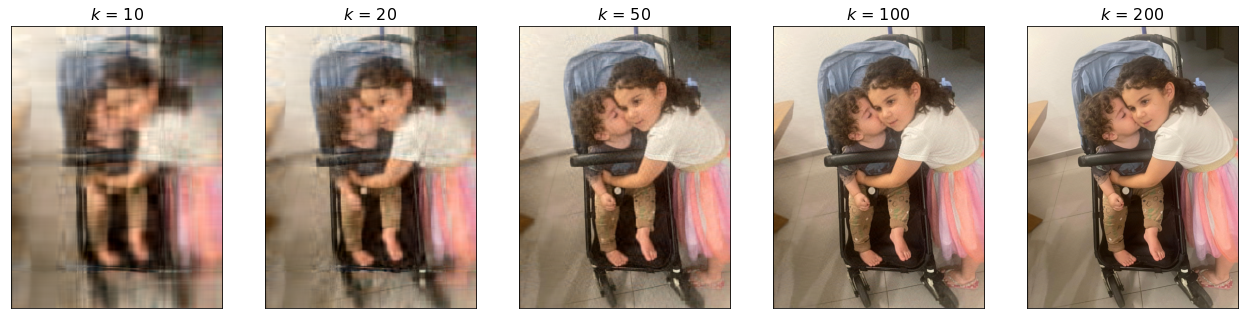

In [25]:
fig, axes = plt.subplots(1, 5, figsize=(22, 17))
plt.setp(axes, xticks=[], yticks=[])  # Remove axes from the subplots

for i, k in enumerate([10, 20, 50, 100, 200]):
    output_image = compress_image(image, k)    
    axes[i].imshow(output_image)
    axes[i].set_title(f'$k$ = {k}', fontsize=16)
    
plt.savefig('figures/truncated_images.pdf')